# Loan Prediction

Importing Packages

In [155]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset 
    
The dataset consists of 614 rows and 13 features, including credit history, marital status, loan amount, and gender. 

Here, the target variable is Loan_Status, which indicates whether a person should be given a loan or not.



In [156]:
#The dataset values stored in Data Frame
data=pd.read_csv("loan_train.csv")
df=pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 entries and  total 13 features (0 to 12) and three types of datatype dtypes: float64(4), int64(1), object(8).

It's memory usage: 62.5+ KB.

Missing values available in the Non-Null Count column.


In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


It shows Summary of numerical variables in data set.

It provides the count, mean, standard deviation (std), min, quartiles and max in its output.


In [159]:
df.shape

(614, 13)

1.Data Cleaning 


Missing Value Imputation:

Check for Null values using isnull() function and finding number of missing values in each column.


In [160]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The  list shows the total amount of missing or corrupt data in Loan data. 
To fix this,  replace missing categorical variables with it's mode
and missing numerical variables with it's mean.

<AxesSubplot:>

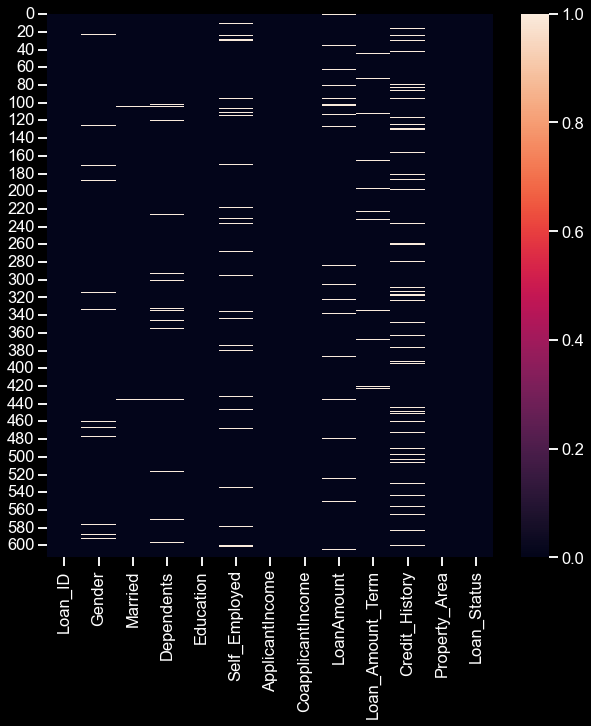

In [161]:
sns.heatmap(df.isnull())

In [162]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'].replace('3+',4,inplace=True)


In [163]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',4,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})


In [164]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [165]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,3,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,3,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


Converting Categorical to Numeric variables:


Converting the target variable's categories into 0 and 1.

So that we can find it's correlation with numerical variables. 

Changing the '3+' in dependent variables to 4 makes it a numerical variable.

Reason to Converting Categorical to Numeric variables, Algorithmns like Logistic Regression only work with numeric values as input.



<AxesSubplot:>

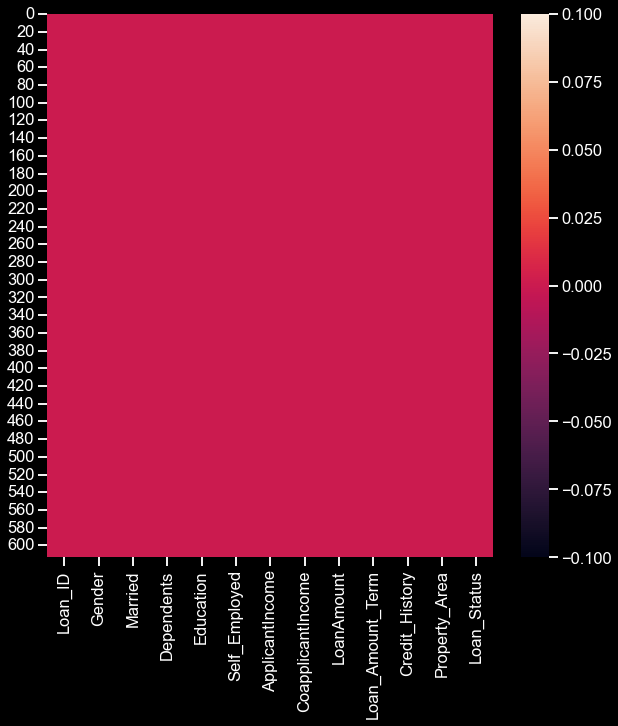

In [166]:
sns.heatmap(df.isnull())

Exploratory Data Analysis

In [167]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [168]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [169]:
# assign to a variable
df_columns = df.columns 
df_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [170]:
for featureName in df_columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))



"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Dependents's" Values with count are :
0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64


Univariate Visual Analysis:

Data Visualization

1    422
0    192
Name: Loan_Status, dtype: int64

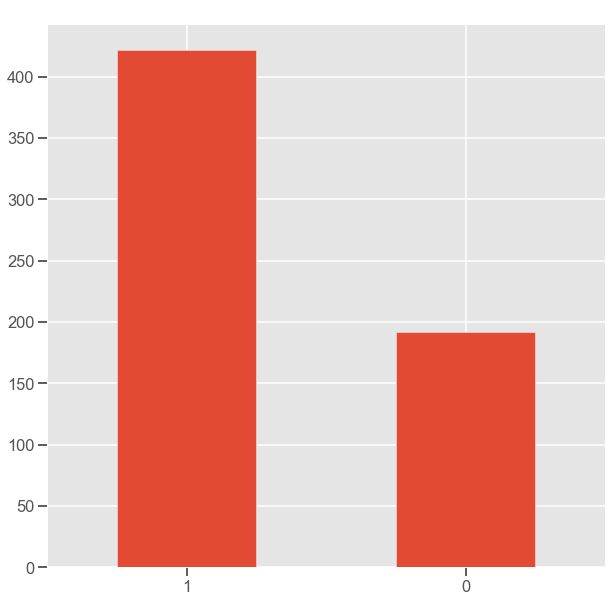

In [171]:
plt.style.use('ggplot')
df['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(df['Loan_Status'].value_counts())

Target Variable - Loan Status

Independent variable is target variable


Analyse this categorical variable using a bar chart as shown above.

The bar chart shows that loan of 422 ( around 69 % ) people out of 614 was approved.

3 Types of Independent Variables: Categorical, Ordinal & Numerical

Categorical Features

1.Gender

2.Marrital Status

3.Employment Type

4.Credit History

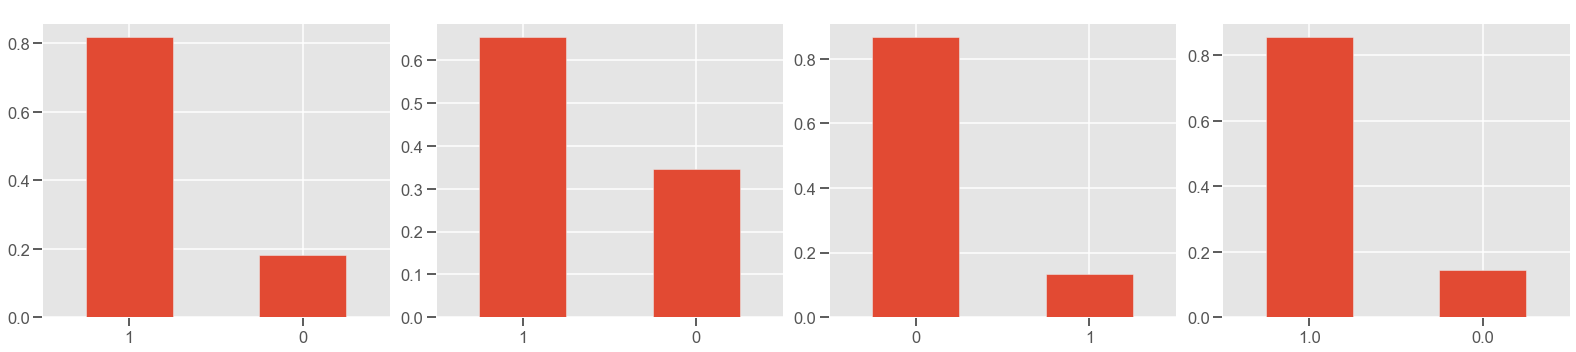

In [172]:
fig1, ax2= plt.subplots(1,4)


df['Gender'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Gender',rot=0)

df['Married'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Married',rot=0)

df['Self_Employed'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Self_Employed',rot=0)

df['Credit_History'].value_counts(normalize=True).plot(ax=ax2[3],kind='bar',title= 'Credit_History',rot=0)

fig1.tight_layout()


Visual Analysis indecates that
    
80% of loan applicants are male in the training dataset.

Nearly 70% are married.

About 75% of loan applicants are graduates.

Nearly 85–90% loan applicants are self-employed.

The loan has been approved for more than 65% of applicants.

Ordinal Features

1.Number of Dependents

2.Education Level

3.Property or Area Background


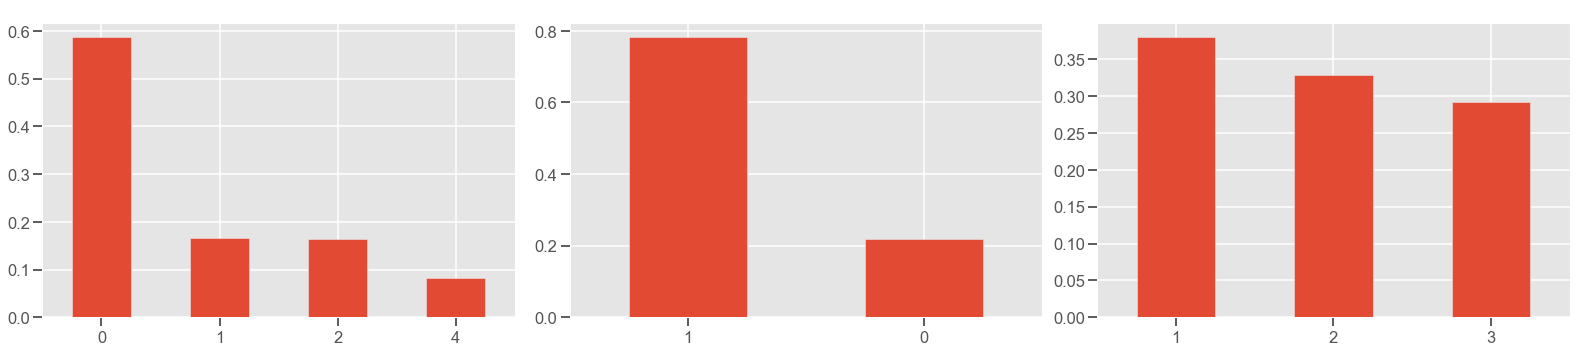

In [173]:
fig2, ax2= plt.subplots(1,3)


df['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

df['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

df['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)

fig2.tight_layout()


Visual Analysis, indecates that

Almost 58% of the applicants have no dependents.

Highest number of applicants are from Semi Urban areas, followed by urban areas.

Around 80 % of the applicants are Graduate.


Univariate Analysis Observations


Count of Male applicants is more than Female.

Count of Married applicant is more than Non-married.

Count of graduate is more than non-Graduate.

Count of self-employed is less than that of Non-Self-employed.

Maximum properties are located in Semiurban areas.

Credit History is present for many applicants.

The count of applicants with several dependents=0 is maximum.

Bivariate Analysis

Bivariate analysis is finding some kind of empirical relationship between two variables. 

Specifically the dependent vs independent Variables.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

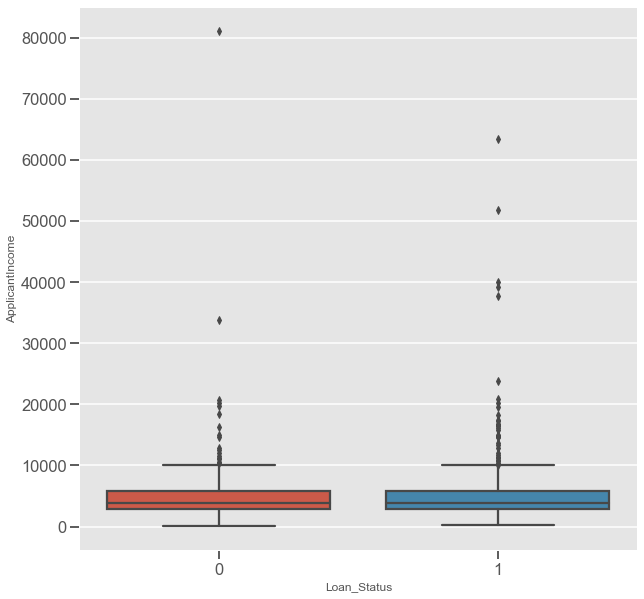

In [174]:

sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

The Mean of ApplicantIncome  0 and 1 are almost the same (o: no,1: Yes)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

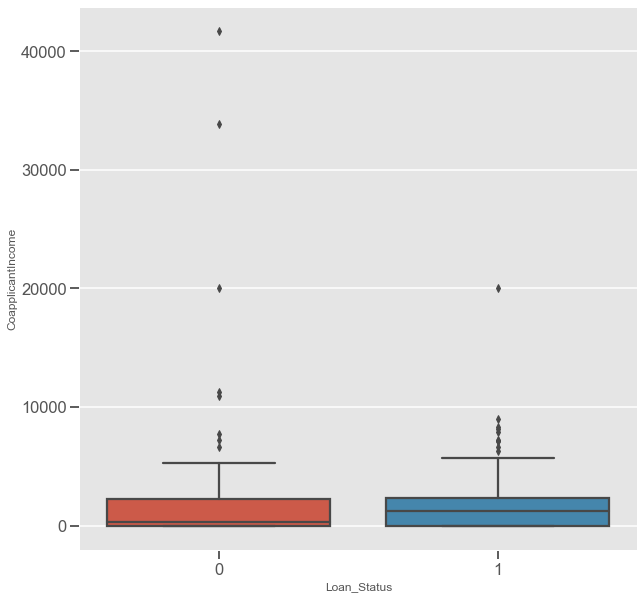

In [175]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df)

The Mean of Co- ApplicantIncome 1 is slightly more than 0 (o: no,1 Yes)


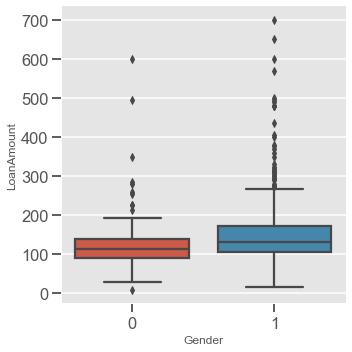

In [176]:
sns.catplot(x='Gender',y='LoanAmount',data=df,kind='box')

The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).




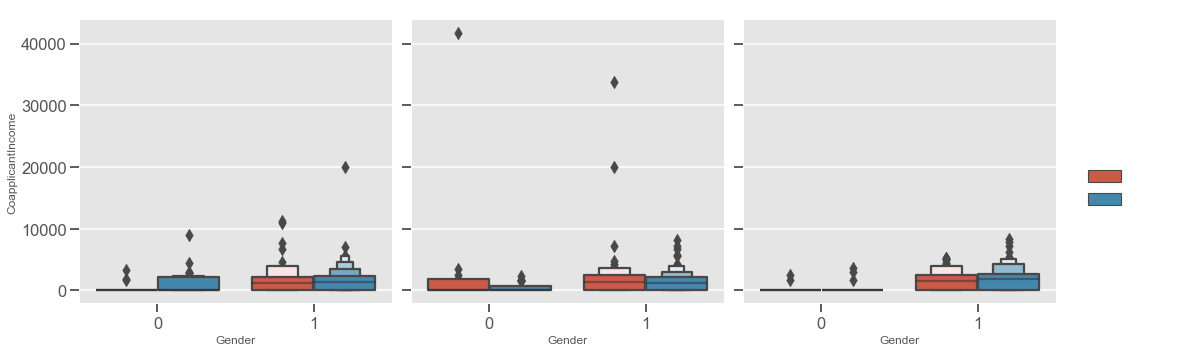

In [177]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=df,kind='boxen',hue='Loan_Status',col='Property_Area')

Male have higher Co-applicant income than females in all three property areas.

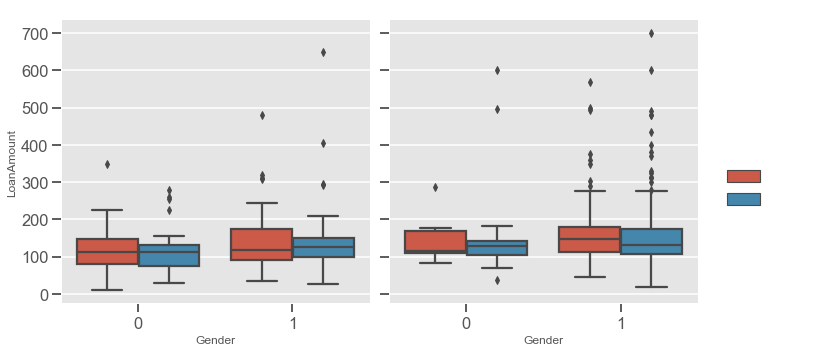

In [178]:
sns.catplot(x='Gender',y='LoanAmount',data=df,kind='box',hue='Loan_Status',col='Married')

 Married  applicants have a slightly higher chances of loan approval.

In [179]:
m= df.corr() 
print(df.head())
Catos = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cato in Catos:
    df[cato] = df[cato].astype('category').cat.codes


    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              0   
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              3            0  
2             

Visualizing correlation via Headmap

The variables with darker color means their correlation is more.


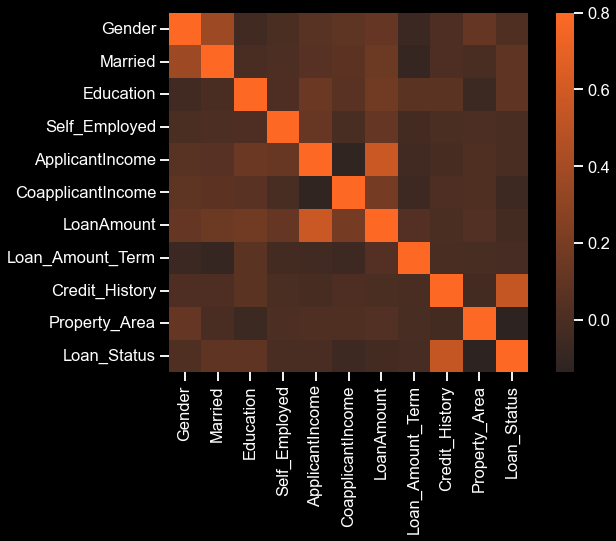

In [180]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
matrix= df.corr() 
fig, ax = plt.subplots(figsize=(9,6))
cmap = sns.dark_palette("#fd6925", as_cmap=True)
fig.tight_layout()
HeatM = sns.heatmap(m,vmax=.8,square=True, cmap=cmap)
plt.rcParams['figure.figsize']=(10,10)
fig = HeatM.get_figure()
fig.savefig('output.png', transparent=True)


The most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

LoanAmount is also correlated with CoapplicantIncome.

Correlation between Quantitative Variables


In [181]:
np.corrcoef(df['LoanAmount'],df['ApplicantIncome'])


array([[1.        , 0.56562046],
       [0.56562046, 1.        ]])

In [ ]:
corelation between loan amount and applicant income is 56%

In [182]:
np.corrcoef(df['LoanAmount'],df['CoapplicantIncome'])


array([[1.        , 0.18782839],
       [0.18782839, 1.        ]])

Correlation between loan amount and coapplicant income is 18 %


In [185]:
df[['Gender', 'ApplicantIncome']].groupby(['Gender'],
                                               as_index = False).mean().sort_values(by = 'Gender', ascending = False)


,Gender,ApplicantIncome
1,1,5573.017928
0,0,4643.473214


In [186]:
df[['Married', 'ApplicantIncome']].groupby(['Married'],
                                               as_index = False).mean().sort_values(by = 'Married', ascending = False)


,Married,ApplicantIncome
1,1,5633.496259
0,0,4970.384977


In [187]:
df[['Education', 'ApplicantIncome']].groupby(['Education'],
                                               as_index = False).mean().sort_values(by = 'Education', ascending = False)


,Education,ApplicantIncome
1,1,5857.433333
0,0,3777.283582


In [188]:
df[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)


,Self_Employed,ApplicantIncome
1,1,7380.817073
0,0,5098.678571


In [189]:
df[['Dependents', 'ApplicantIncome']].groupby(['Dependents'],
                                               as_index = False).mean().sort_values(by = 'Dependents', ascending = False)


,Dependents,ApplicantIncome
3,3,4926.782178
2,2,5962.274510
1,1,4928.680556
0,0,8581.215686


In [190]:
df[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                               as_index = False).mean().sort_values(by = 'Gender', 
                                                                                          ascending = False)


,Gender,Married,ApplicantIncome
2,1,0,5251.045113
3,1,1,5689.067751
0,0,0,4503.787500
1,0,1,4992.687500


In [ ]:
Conclusion:
    
    
Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.

Bivariate and multivariate analysis to see imapct of one another on their features using charts.

Each variable to check if data is cleaned and normally distributed.

The data Cleaned and removed NA values.

Correaltion between independent variables and found that applicant income and loan amount have significant relation.